# Klasifikasi Perokok dan Non-perokok

- Nama : Stephen Helenus Ruswawnto Kaawoan
- Email : stephenhelk@gmail.com
- Linkedin : [Linkedin](https://www.linkedin.com/in/stephenhelenus/)
- Instagram [Instagram](instagram.com/stephenhelenus)

# Import Library

In [1]:
from google.colab import userdata
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Memuat Dataset

In [2]:
# Ambil kredensial dari Google Colab Secrets
kaggle_username = userdata.get('kaggle_username')  # Nama pengguna
kaggle_key = userdata.get('kaggle_key')     # Kunci API

# Set variabel lingkungan untuk Kaggle
os.environ['KAGGLE_USERNAME'] = kaggle_username
os.environ['KAGGLE_KEY'] = kaggle_key

In [3]:
!kaggle datasets download -d kukuroo3/body-signal-of-smoking

Dataset URL: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking
License(s): CC0-1.0
  0% 0.00/3.40M [00:00<?, ?B/s]
100% 3.40M/3.40M [00:00<00:00, 199MB/s]


In [4]:
!unzip body-signal-of-smoking.zip

Archive:  body-signal-of-smoking.zip
  inflating: competition_format/x_test.csv  
  inflating: competition_format/x_train.csv  
  inflating: competition_format/y_test.csv  
  inflating: competition_format/y_train.csv  
  inflating: smoking.csv             


In [5]:
df = pd.read_csv('smoking.csv')
df = df.sample(n=5000, random_state=42)

# Exploratory Data Analysis (EDA)

## Struktur Data

In [6]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
33967,42427,F,45,160,55,71.0,1.0,0.5,1.0,1.0,...,11.3,1.0,0.8,17.0,10.0,11.0,Y,0,Y,0
21956,27412,F,55,145,40,80.4,0.8,0.5,1.0,1.0,...,14.0,1.0,0.7,24.0,14.0,19.0,Y,1,N,1
15458,19283,M,25,170,80,94.0,1.0,1.2,1.0,1.0,...,16.6,1.0,0.8,82.0,146.0,248.0,Y,1,N,0
36215,45261,M,45,170,70,82.0,0.5,0.4,1.0,1.0,...,14.9,1.0,0.6,27.0,45.0,70.0,Y,0,N,0
8886,11155,M,40,165,60,77.0,1.2,1.2,1.0,1.0,...,16.4,1.0,1.0,40.0,69.0,55.0,Y,0,N,0


In [7]:
df = df.drop(columns=[
    'ID', 'height(cm)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
    'hearing(left)', 'hearing(right)', 'fasting blood sugar', 'Cholesterol',
    'triglyceride', 'HDL', 'LDL', 'Urine protein', 'AST', 'ALT', 'oral', 'dental caries'
])

In [8]:
row, col = df.shape
print(f"Jumlah kolom: {col}")
print(f"Jumlah baris: {row}")

Jumlah kolom: 10
Jumlah baris: 5000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 33967 to 38838
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5000 non-null   object 
 1   age               5000 non-null   int64  
 2   weight(kg)        5000 non-null   int64  
 3   systolic          5000 non-null   float64
 4   relaxation        5000 non-null   float64
 5   hemoglobin        5000 non-null   float64
 6   serum creatinine  5000 non-null   float64
 7   Gtp               5000 non-null   float64
 8   tartar            5000 non-null   object 
 9   smoking           5000 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 429.7+ KB


In [10]:
df.describe()

,age,weight(kg),systolic,relaxation,hemoglobin,serum creatinine,Gtp,smoking
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,44.214000,65.808000,121.487000,76.207400,14.627340,0.885180,39.340400,0.369600
std,11.979186,12.797652,13.477201,9.660199,1.580639,0.233138,49.598804,0.482745
min,20.000000,35.000000,79.000000,48.000000,5.800000,0.100000,5.000000,0.000000
25%,40.000000,55.000000,112.000000,70.000000,13.600000,0.800000,17.000000,0.000000
50%,40.000000,65.000000,120.000000,76.000000,14.800000,0.900000,25.000000,0.000000
75%,50.000000,75.000000,130.000000,82.000000,15.800000,1.000000,43.000000,1.000000
max,85.000000,130.000000,183.000000,121.000000,20.000000,10.000000,999.000000,1.000000


## Cek NULL dan DUPLICATED

In [11]:
df.isnull().sum()
df.dropna(inplace=True)

In [12]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## Menangani Outlier

age column: 293 outlier
weight(kg) column: 19 outlier
systolic column: 51 outlier
relaxation column: 61 outlier
hemoglobin column: 69 outlier
serum creatinine column: 258 outlier
Gtp column: 407 outlier
smoking column: 0 outlier


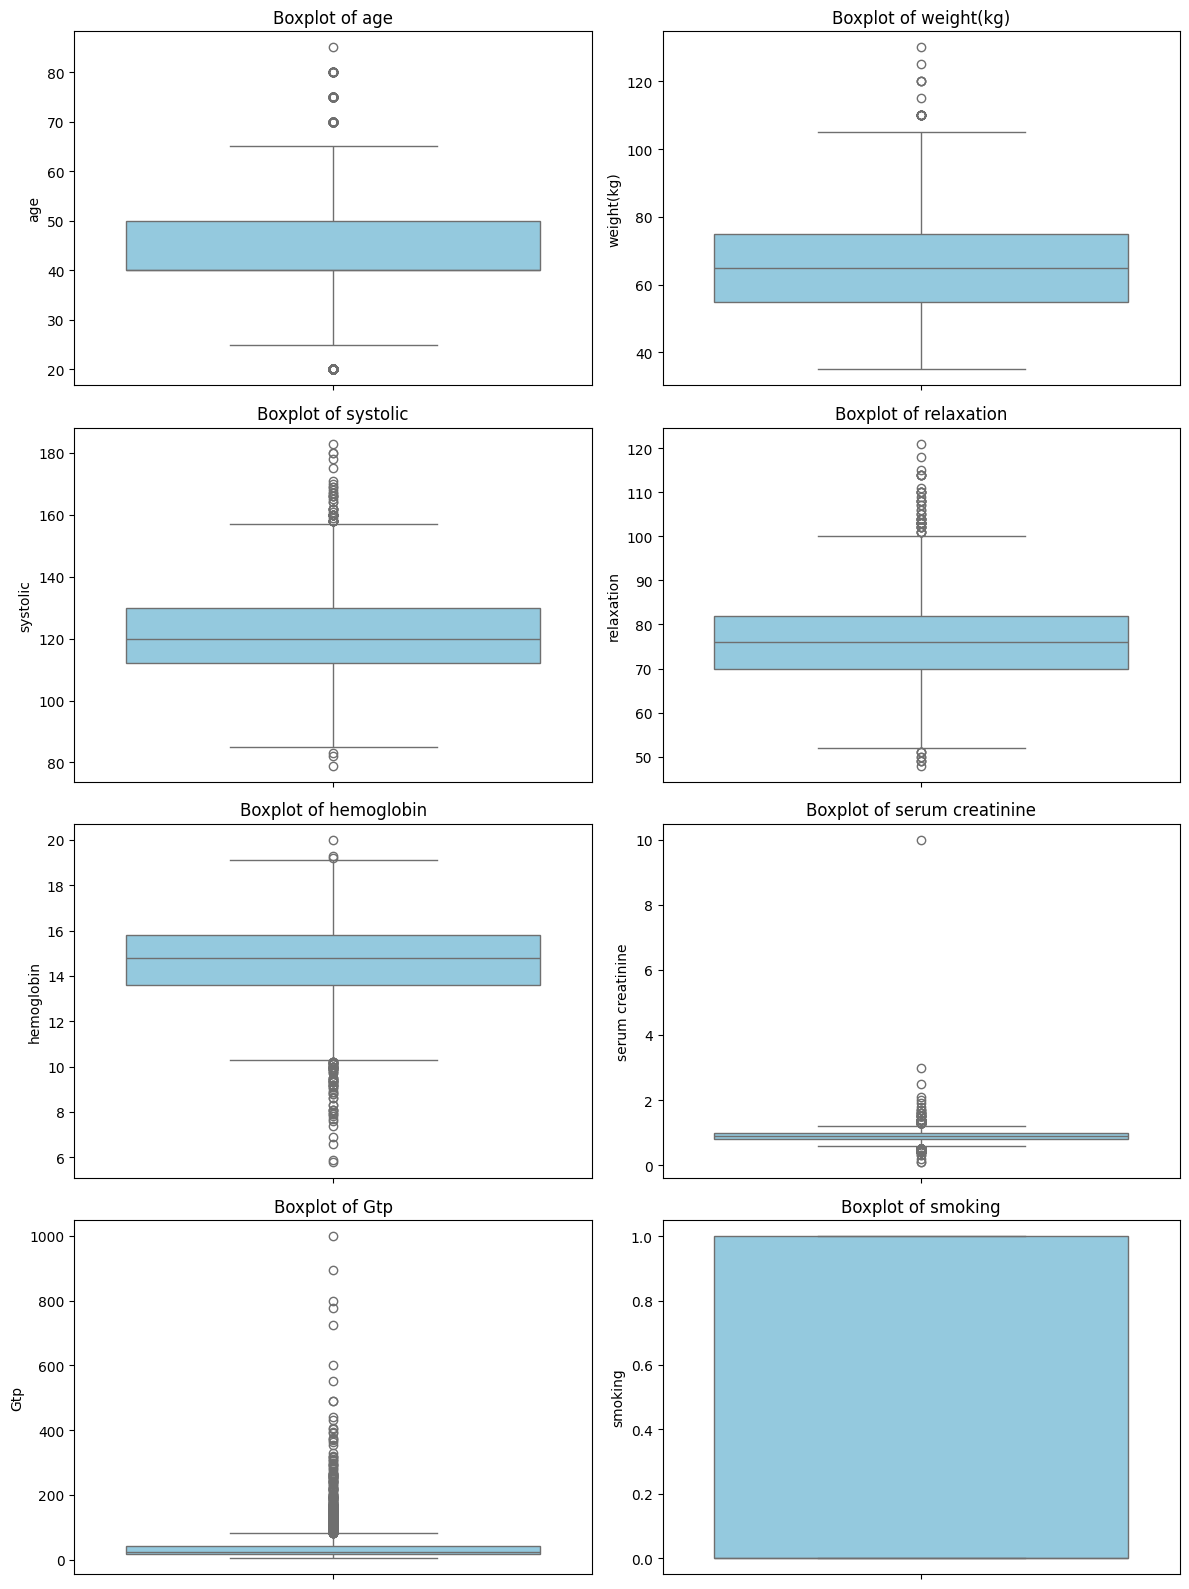

In [13]:


numeric_columns = df.select_dtypes(include=['number']).columns

n_cols = 2  # jumlah kolom subplot
n_rows = math.ceil(len(numeric_columns) / n_cols)  # hitung jumlah baris yang diperlukan

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} column: {len(outliers)} outlier")

plt.tight_layout()
plt.show()

In [14]:
columns_to_check = df.select_dtypes(include=['number']).columns

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df = remove_outliers(df, columns_to_check)

age column: 0 outlier
weight(kg) column: 0 outlier
systolic column: 0 outlier
relaxation column: 45 outlier
hemoglobin column: 9 outlier
serum creatinine column: 0 outlier
Gtp column: 135 outlier
smoking column: 0 outlier


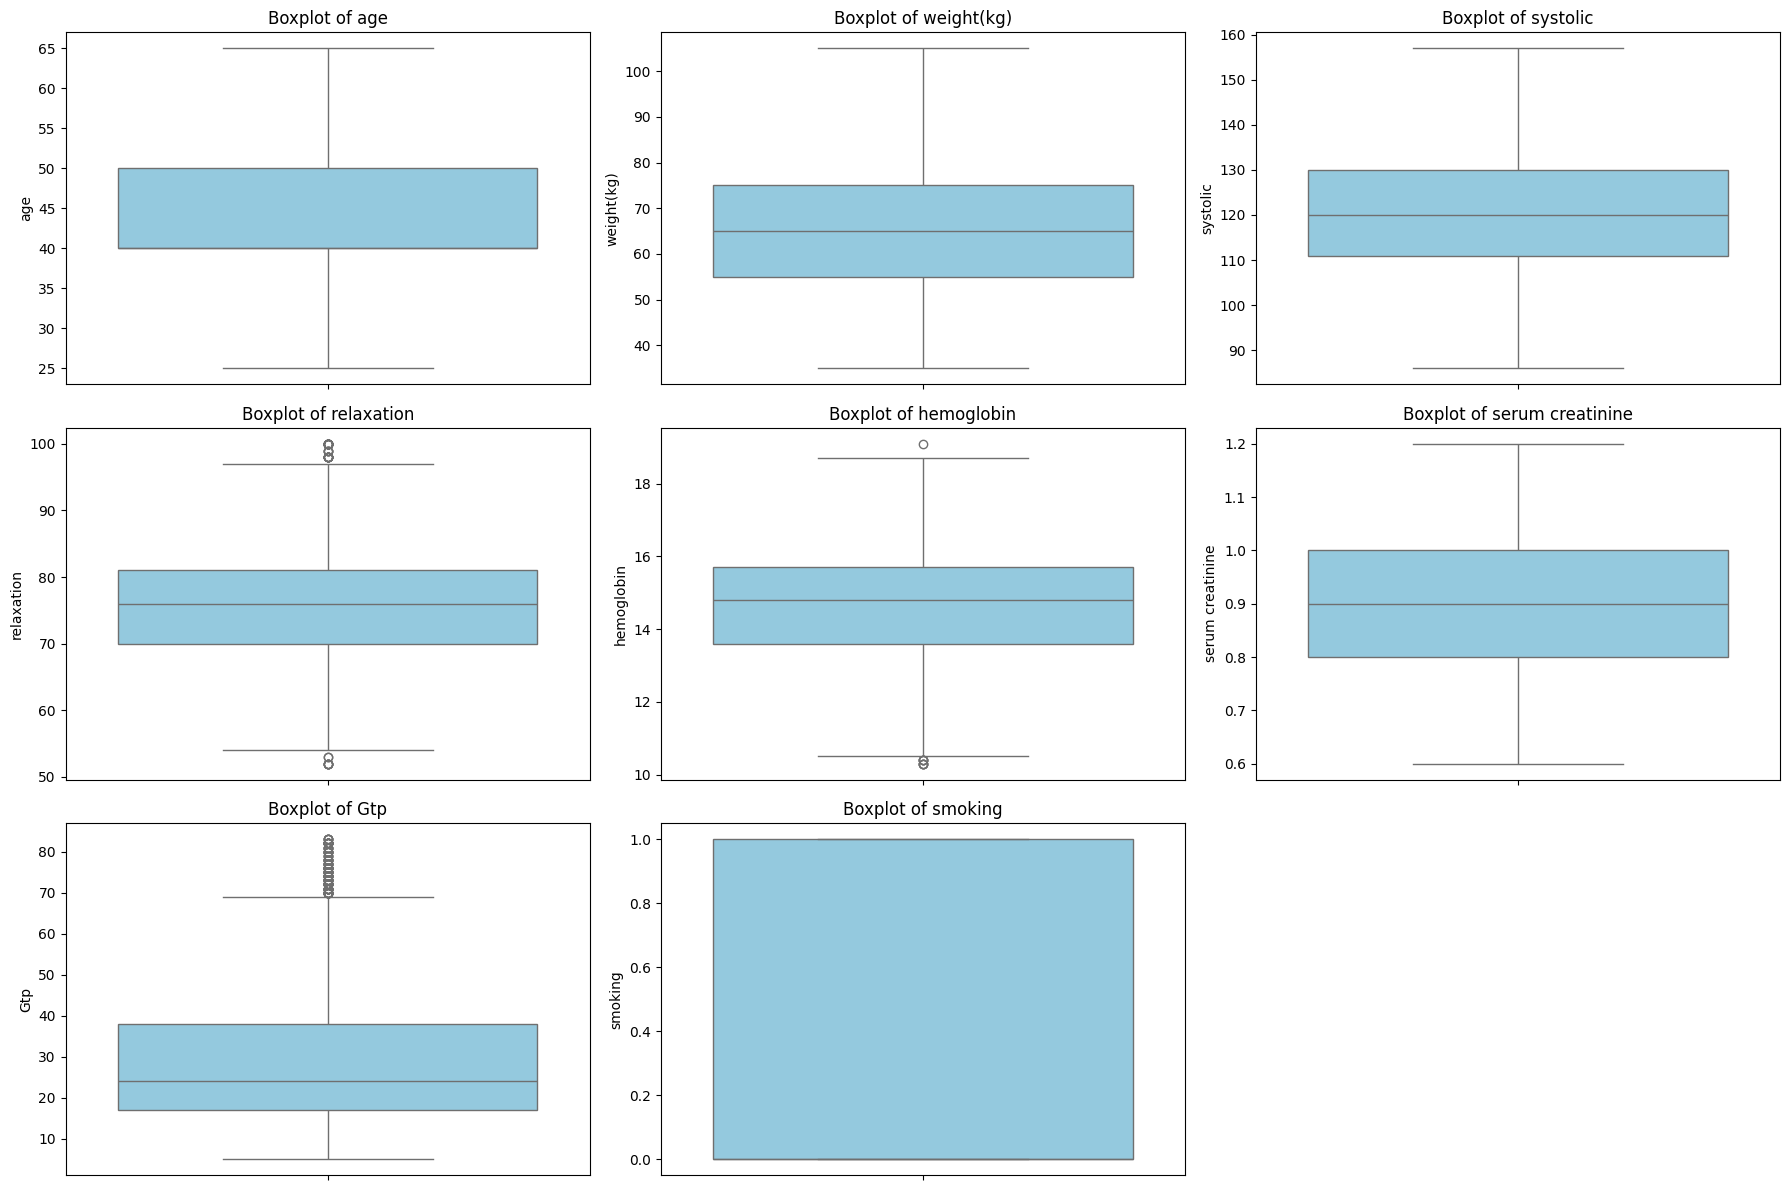

In [15]:
numeric_columns = df.select_dtypes(include=['number']).columns

n_cols = 3  # jumlah kolom subplot
n_rows = math.ceil(len(numeric_columns) / n_cols)  # hitung jumlah baris yang diperlukan

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} column: {len(outliers)} outlier")

plt.tight_layout()
plt.show()

## Visualisasi Data Numerik & Kategorikal

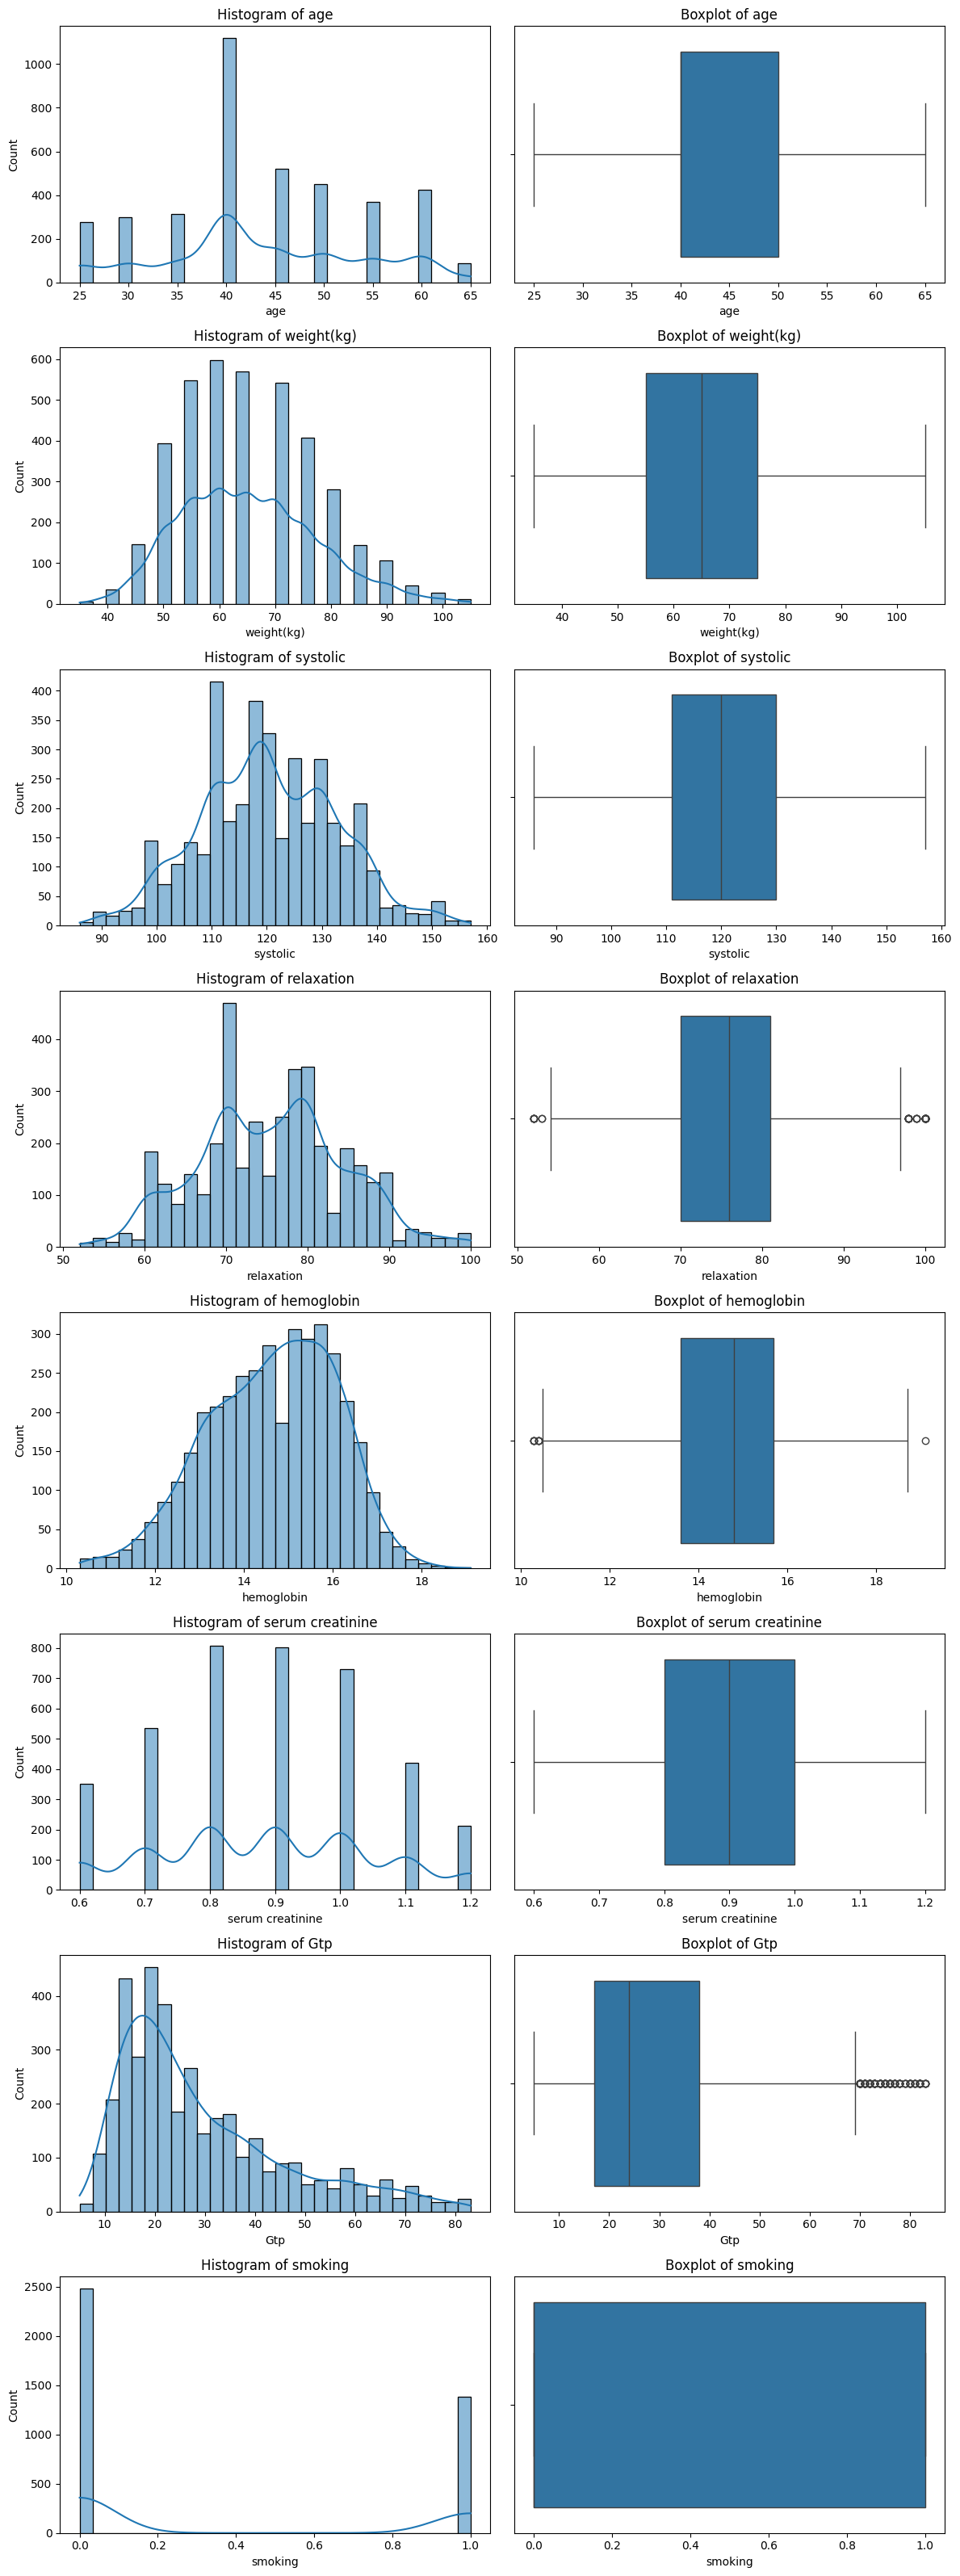

In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
n = len(numerical_cols)

total_plots = 2 * n

rows = n

fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')

    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Categorical columns: ['gender', 'tartar']


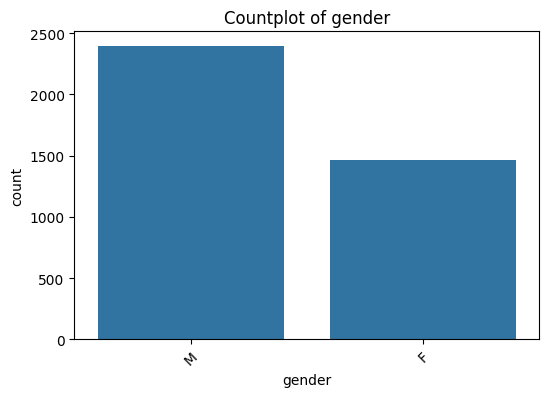

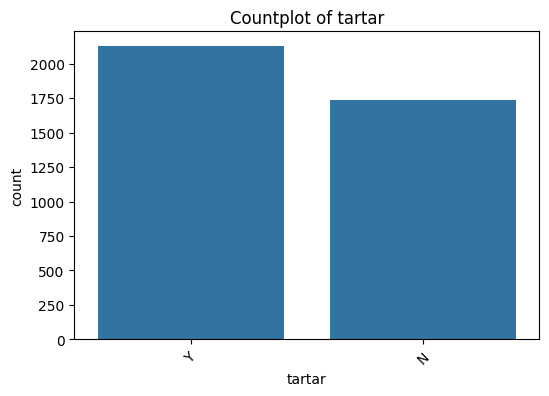

In [17]:
#Visualisasi Data Kategorikal
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Countplot untuk data kategorikal
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1000x600 with 0 Axes>

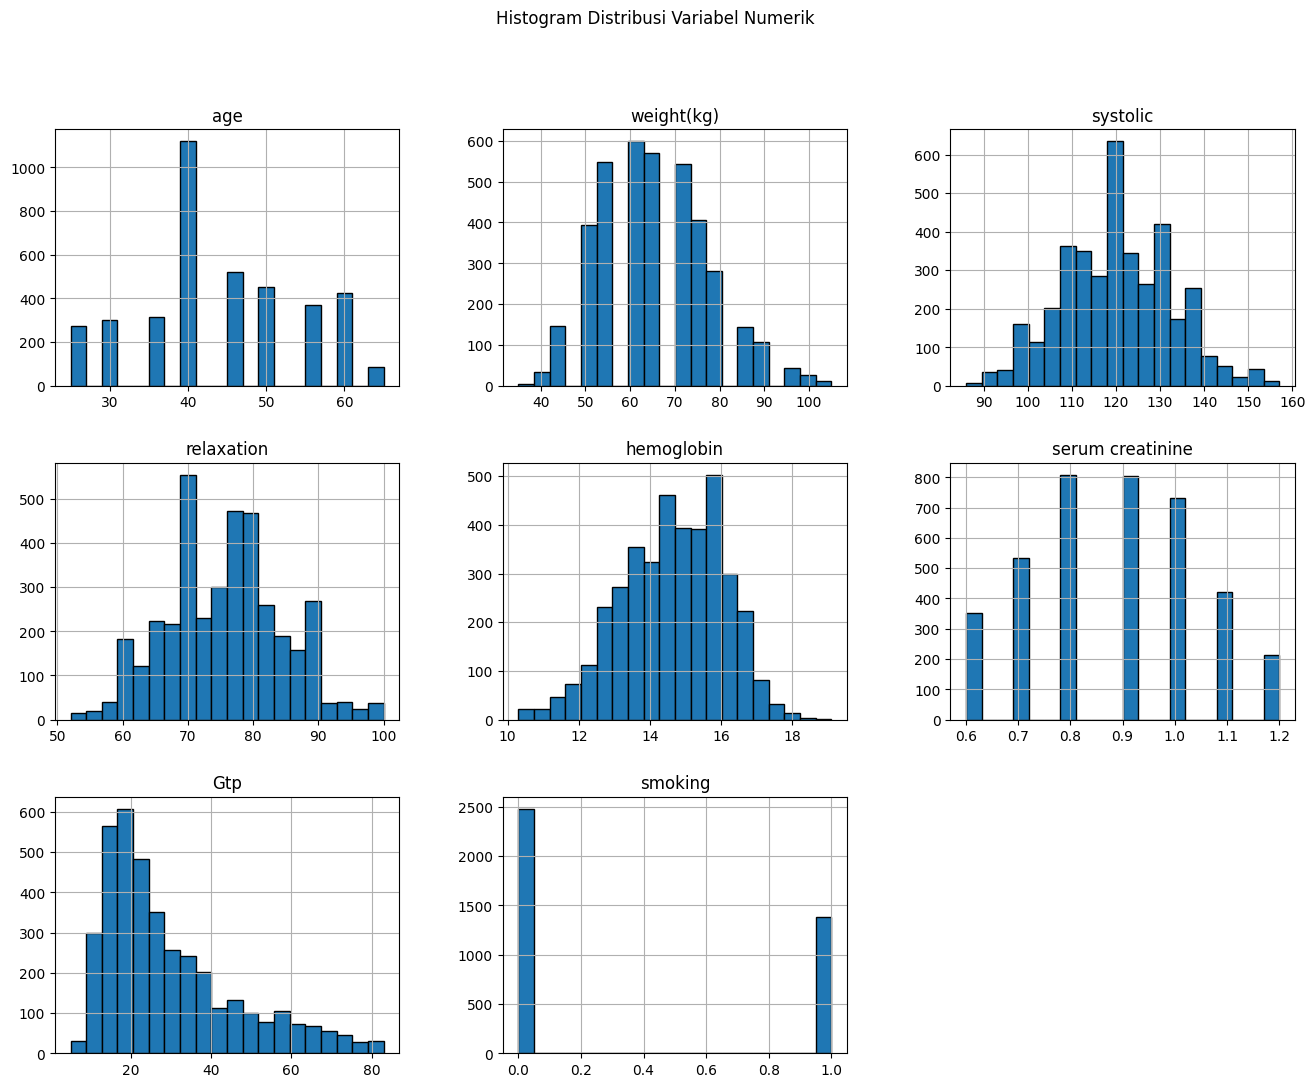

In [18]:
plt.figure(figsize=(10, 6))
df.select_dtypes(include=['number']).hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle("Histogram Distribusi Variabel Numerik")
plt.show()

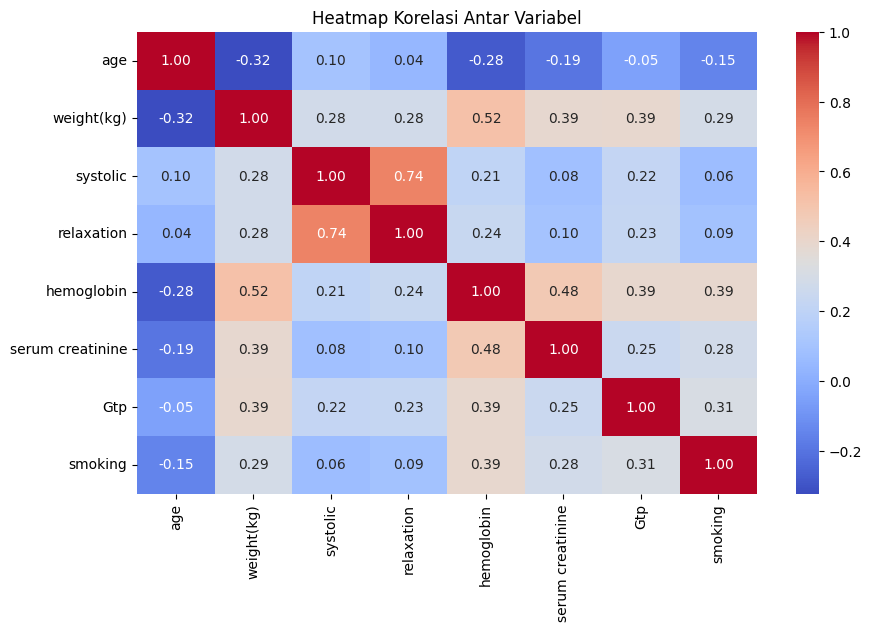

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

fasting blood sugar, Cholesterol, triglyceride, Urine protein	Merokok tidak selalu berdampak langsung terhadap parameter-parameter ini, dan bisa memiliki noise tinggi (dipengaruhi pola makan, genetik, dsb)

Systolic & Relaxation (tekanan darah)

GTP (γ-GTP), ALT, AST (indikator fungsi hati → sangat terpengaruh oleh merokok dan alkohol)

Hemoglobin

Serum Creatinine

HDL / LDL (jika tetap dipertahankan → indikator jantung)

Tartar dan Dental Caries (berhubungan dengan kebersihan mulut dan dampak nikotin)

## Encoding Fitur Kategorikal

In [20]:
label_encoder = LabelEncoder()

categorical_columns = ['gender', 'tartar']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,gender,age,weight(kg),systolic,relaxation,hemoglobin,serum creatinine,Gtp,tartar,smoking
33967,0,45,55,111.0,56.0,11.3,0.8,11.0,1,0
21956,0,55,40,104.0,70.0,14.0,0.7,19.0,0,1
36215,1,45,70,124.0,82.0,14.9,0.6,70.0,0,0
8886,1,40,60,123.0,73.0,16.4,1.0,55.0,0,0
49225,0,50,55,140.0,80.0,13.1,0.7,12.0,1,0


## Standarisasi Fitur Numerik

In [21]:
# Buat instance StandardScaler
scaler = StandardScaler()

X = df.drop(columns=['smoking'])
y = df['smoking']

numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

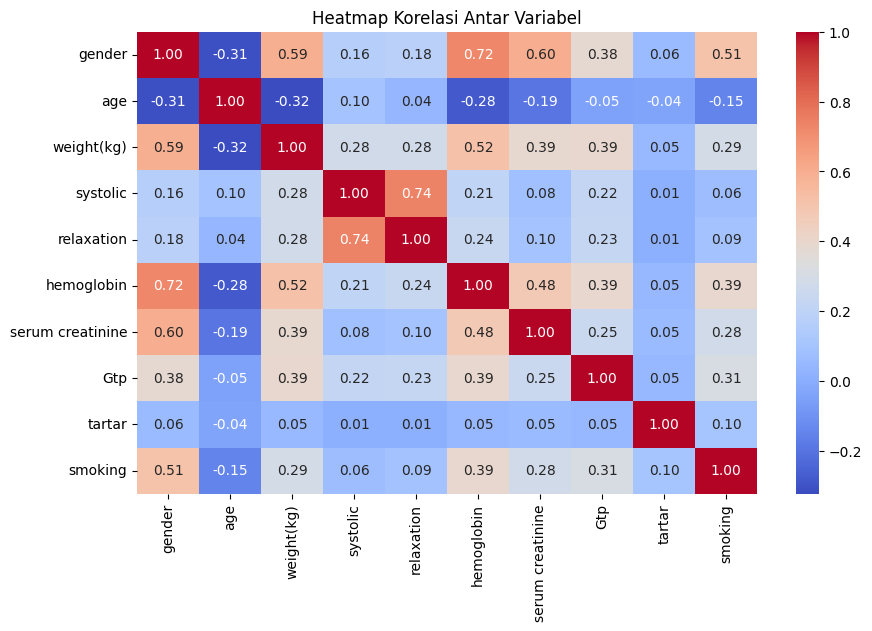

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# Data Splitting

In [23]:
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3088, 9), y_train=(3088,)
Test set shape: X_test=(773, 9), y_test=(773,)


# Pelatihan Model

In [24]:
lr = LogisticRegression().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


In [25]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'Logistic Regression (LR)': evaluate_model(lr, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0      Logistic Regression (LR)  0.714101   0.584071  0.712230  0.641815
1  Support Vector Machine (SVM)  0.720569   0.589595  0.733813  0.653846


In [26]:
# Parameter grid untuk Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],       # Regularisasi
    'solver': ['liblinear', 'lbfgs']
}

# Parameter grid untuk SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],   # Jenis kernel
    'gamma': ['scale', 'auto']     # Parameter kernel RBF
}

# Inisialisasi model dasar
base_lr = LogisticRegression()
base_svm = SVC()

# Lakukan GridSearchCV untuk Logistic Regression
grid_search_lr = GridSearchCV(base_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
print("Best Logistic Regression Parameters:", grid_search_lr.best_params_)

# Lakukan GridSearchCV untuk SVM
grid_search_svm = GridSearchCV(base_svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
best_svm = grid_search_svm.best_estimator_
print("Best SVM Parameters:", grid_search_svm.best_params_)


Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'liblinear'}
Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [27]:
# Evaluasi kembali menggunakan model terbaik
tuned_results = {
    'Logistic Regression (Tuned)': evaluate_model(best_lr, X_test, y_test),
    'Support Vector Machine (Tuned)': evaluate_model(best_svm, X_test, y_test),
}

# Gabungkan hasil evaluasi awal dan hasil tuning
for model_name, metrics in tuned_results.items():
    results[model_name] = metrics

# Perbarui summary DataFrame
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)
print("\n=== Ringkasan Performa Model ===")
print(summary_df)


=== Ringkasan Performa Model ===
                            Model  Accuracy  Precision    Recall  F1-Score
0        Logistic Regression (LR)  0.714101   0.584071  0.712230  0.641815
1    Support Vector Machine (SVM)  0.720569   0.589595  0.733813  0.653846
2     Logistic Regression (Tuned)  0.721863   0.591304  0.733813  0.654896
3  Support Vector Machine (Tuned)  0.719276   0.577608  0.816547  0.676602


# Evaluasi

=== Classification Report: Logistic Regression (Tuned) ===
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       495
           1       0.59      0.73      0.65       278

    accuracy                           0.72       773
   macro avg       0.71      0.72      0.71       773
weighted avg       0.74      0.72      0.73       773



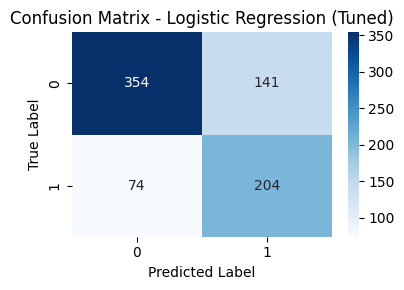

=== Classification Report: Support Vector Machine (Tuned) ===
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       495
           1       0.58      0.82      0.68       278

    accuracy                           0.72       773
   macro avg       0.72      0.74      0.71       773
weighted avg       0.76      0.72      0.72       773



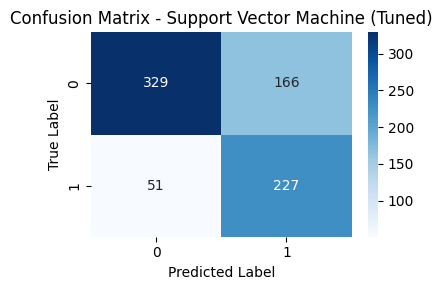

In [28]:
# Daftar model terbaik untuk evaluasi akhir
final_models = {
    "Logistic Regression (Tuned)": best_lr,
    "Support Vector Machine (Tuned)": best_svm
}

# Fungsi untuk mencetak classification report dan plot confusion matrix
def evaluate_and_report(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)

    # Classification Report
    print(f"=== Classification Report: {model_name} ===")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Evaluasi untuk semua model akhir
for name, model in final_models.items():
    evaluate_and_report(model, name, X_test, y_test)